# Web Scrapping and Sentiment Analysis

This project is to fetch product reviews from Amazon. Splash and BeautifulSoup are used to render mutiple pages and return raw HTML, and extract the data for analysis.

#### Section 1: Amazon Web Scrapping

In [1]:
# import libraries needed

from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.graph_objs as go
from plotly.subplots import make_subplots
plt.style.use('fivethirtyeight')


import warnings
warnings.filterwarnings('ignore')
warnings.warn('this will not show')

pd.set_option('display.max_columns', None)

In [2]:
# Connect to Website and pull in data

url = 'https://www.amazon.co.uk/Bluetooth-LENRUE-Enhanced-Waterproof-Portable-Matte-Black/product-reviews/B089LLT2P8/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews&sortBy=recent&pageNumber=1'


In [3]:
# Define BeautifulSoup to parse the HTML file
# Use splash url instead of the main url to send a get requests

def get_soup(url):    
    r = requests.get('http://localhost:8050/render.html', params={'url': url,'wait':2})
    soup = BeautifulSoup(r.text, "html.parser")
    return soup


In [4]:
# create an empty list to store the data
reviewlist = []

# Extract the data needed
def get_reviews(soup):
    reviews = soup.find_all('div', {'class': 'a-section review aok-relative'})
    try:
        for review in reviews:
            post = {
            'name': review.find('span', {'class': 'a-profile-name'}).text.replace('\n',' ').strip(),
            'rating': float(review.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'date_post': review.find('span', {'class': 'a-size-base a-color-secondary review-date'}).text.replace('\n',' ').replace('Reviewed in the United Kingdom on ',' ').replace('Reviewed in the United Kingdom 🇬🇧 on ',' ').strip(),
            'title': review.find('a', {'data-hook': 'review-title'}).text.replace('\n',' ').strip(),
            'review': review.find('span', {'data-hook':"review-body"}).text.replace('\n',' ').strip()
            }
            reviewlist.append(post)
    except:
        pass

    

In [6]:
# Create loop for fetching data from multiple pages

for x in range(1,999):
    soup = get_soup(f'https://www.amazon.co.uk/Bluetooth-LENRUE-Enhanced-Waterproof-Portable-Matte-Black/product-reviews/B089LLT2P8/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews&sortBy=recent&pageNumber={x}')
    print(f'Getting page: {x}')
    get_reviews(soup)
    print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

Getting page: 1
10
Getting page: 2
20
Getting page: 3
30
Getting page: 4
40
Getting page: 5
50
Getting page: 6
60
Getting page: 7
70
Getting page: 8
80
Getting page: 9
90
Getting page: 10
100
Getting page: 11
110
Getting page: 12
120
Getting page: 13
130
Getting page: 14
140
Getting page: 15
150
Getting page: 16
160
Getting page: 17
170
Getting page: 18
180
Getting page: 19
190
Getting page: 20
200
Getting page: 21
210
Getting page: 22
220
Getting page: 23
230
Getting page: 24
240
Getting page: 25
250
Getting page: 26
260
Getting page: 27
270
Getting page: 28
280
Getting page: 29
290
Getting page: 30
300
Getting page: 31
310
Getting page: 32
320
Getting page: 33
330
Getting page: 34
340
Getting page: 35
350
Getting page: 36
360
Getting page: 37
370
Getting page: 38
380
Getting page: 39
390
Getting page: 40
400
Getting page: 41
410
Getting page: 42
420
Getting page: 43
430
Getting page: 44
440
Getting page: 45
450
Getting page: 46
460
Getting page: 47
470
Getting page: 48
480
Getting pa

In [7]:
# Create dataframe and export as excel format

df = pd.DataFrame(reviewlist)
df.to_excel('bluetooth speaker.xlsx', index=False)
print('Fin.')

Fin.


#### Section 2: Sentiment Analysis

In [8]:
df.head()

,name,rating,date_post,title,review
0,Patrick O.,5.0,1 June 2023,Bluetooth Speaker,"Really good product, the bass is really Powerf..."
1,Kloè Farrugia-Hutchings,5.0,21 May 2023,Love,I absolutely love this speaker. When listening...
2,Gail,1.0,20 May 2023,Save your money,Gave the speaker a full charge. It registered ...
3,Lesley B.,5.0,17 May 2023,Excellent,"This is perfect for the car.Sounds great, look..."
4,Paul Wright,3.0,8 May 2023,quality,decent sound but battery life not so good


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       769 non-null    object 
 1   rating     769 non-null    float64
 2   date_post  769 non-null    object 
 3   title      769 non-null    object 
 4   review     769 non-null    object 
dtypes: float64(1), object(4)
memory usage: 30.2+ KB


In [10]:
# check missing values

df.isnull().sum()

name         0
rating       0
date_post    0
title        0
review       0
dtype: int64

In [11]:
# create a function to get subjectivity
# subjectivity tells how subjective or opinioned the text is
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# create a function to get polarity
# the polarity tells how positive or negative the text is
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# create two new columns
df['subjectivity'] = df['review'].apply(getSubjectivity)
df['polarity'] = df['review'].apply(getPolarity)

df


,name,rating,date_post,title,review,subjectivity,polarity
0,Patrick O.,5.0,1 June 2023,Bluetooth Speaker,"Really good product, the bass is really Powerf...",0.596667,0.160000
1,Kloè Farrugia-Hutchings,5.0,21 May 2023,Love,I absolutely love this speaker. When listening...,0.666667,0.633333
2,Gail,1.0,20 May 2023,Save your money,Gave the speaker a full charge. It registered ...,0.502778,0.158333
3,Lesley B.,5.0,17 May 2023,Excellent,"This is perfect for the car.Sounds great, look...",0.637500,0.675000
4,Paul Wright,3.0,8 May 2023,quality,decent sound but battery life not so good,0.555556,0.422222
...,...,...,...,...,...,...,...
764,Daniella Fyfe,5.0,17 August 2020,Great speaker,Wow this little speaker is great ! So easy to ...,0.694583,0.388229
765,robin crowther,5.0,12 August 2020,BIG sound from such a small speaker,"Excellent sound & fantastic bass, I was surpri...",0.600000,0.307143
766,Bryan,5.0,10 August 2020,brilliant,Absolutely amazing Bluetooth speaker excellent...,0.766667,0.666667
767,PROS & CONS,5.0,8 August 2020,🔊 Small but mighty! This is a must have in any...,The media could not be loaded. ...,0.524952,0.222500


In [12]:
# create a function to compute the negative, neutral and positive analysis

def getAnalysis(score):
    if score <0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

df['analysis'] = df['polarity'].apply(getAnalysis)
    
df

,name,rating,date_post,title,review,subjectivity,polarity,analysis
0,Patrick O.,5.0,1 June 2023,Bluetooth Speaker,"Really good product, the bass is really Powerf...",0.596667,0.160000,Positive
1,Kloè Farrugia-Hutchings,5.0,21 May 2023,Love,I absolutely love this speaker. When listening...,0.666667,0.633333,Positive
2,Gail,1.0,20 May 2023,Save your money,Gave the speaker a full charge. It registered ...,0.502778,0.158333,Positive
3,Lesley B.,5.0,17 May 2023,Excellent,"This is perfect for the car.Sounds great, look...",0.637500,0.675000,Positive
4,Paul Wright,3.0,8 May 2023,quality,decent sound but battery life not so good,0.555556,0.422222,Positive
...,...,...,...,...,...,...,...,...
764,Daniella Fyfe,5.0,17 August 2020,Great speaker,Wow this little speaker is great ! So easy to ...,0.694583,0.388229,Positive
765,robin crowther,5.0,12 August 2020,BIG sound from such a small speaker,"Excellent sound & fantastic bass, I was surpri...",0.600000,0.307143,Positive
766,Bryan,5.0,10 August 2020,brilliant,Absolutely amazing Bluetooth speaker excellent...,0.766667,0.666667,Positive
767,PROS & CONS,5.0,8 August 2020,🔊 Small but mighty! This is a must have in any...,The media could not be loaded. ...,0.524952,0.222500,Positive


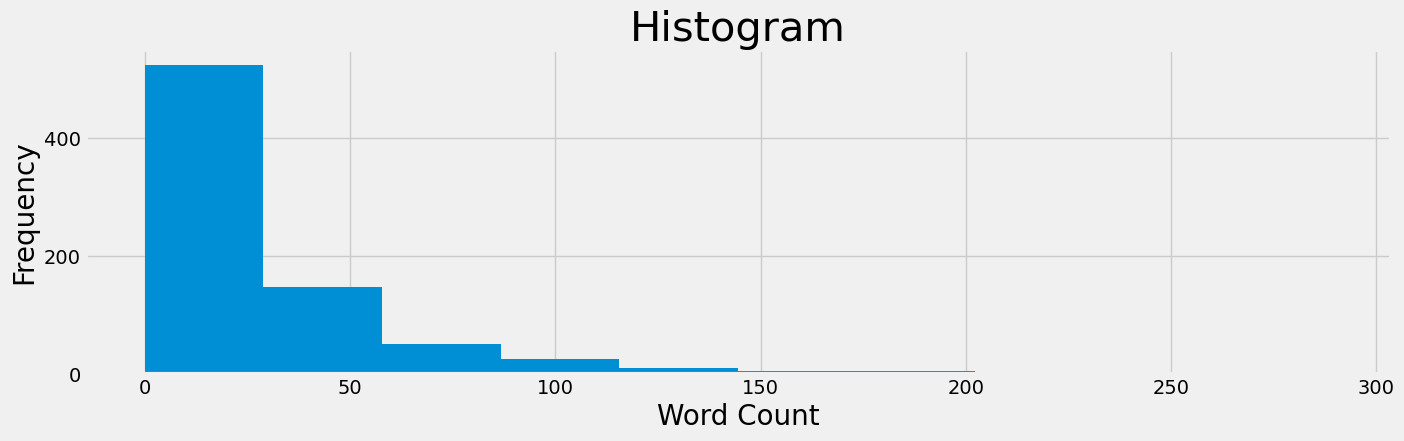

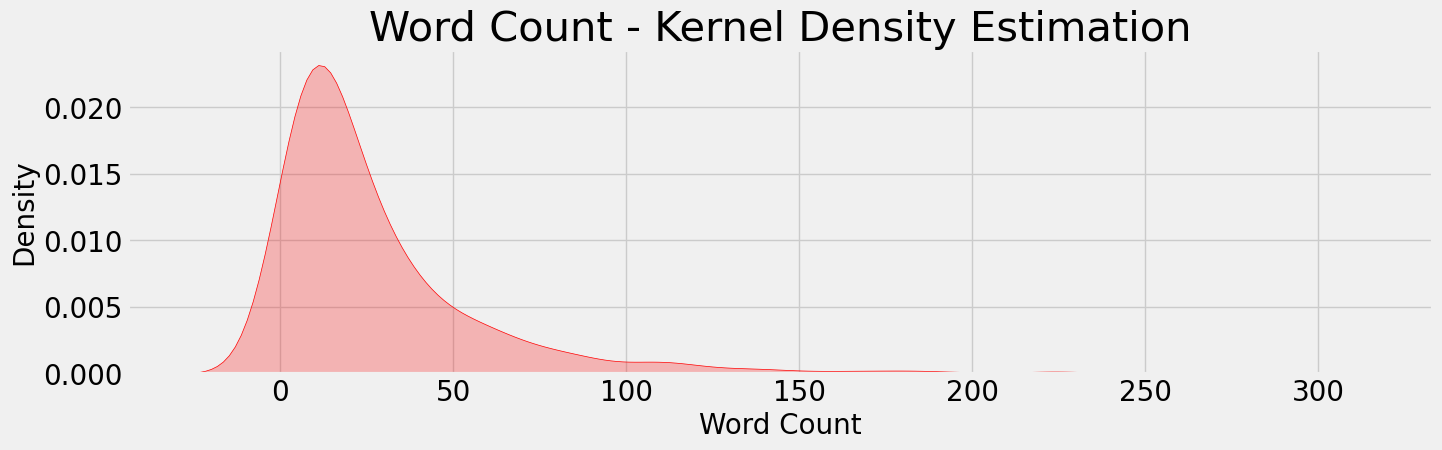

In [13]:
# Create a new column of word counts
df['word_count'] = df['review'].str.split().str.len()
# Histogram
fig = plt.figure(figsize=(15, 4))             
plt.hist(df['word_count'] )                   
plt.rcParams['font.size'] = 20                
plt.ylabel("Frequency", fontsize = 20)        
plt.xlabel("Word Count", fontsize = 20)       
plt.title("Histogram", fontsize = 30)         
plt.show()

# Kernel Density Plot
fig = plt.figure(figsize=(15, 4))            
ax = sns.kdeplot(df['word_count'],            
         color = "Red", shade = True)
ax.set_ylabel("Density", fontsize = 20)       
ax.set_xlabel("Word Count", fontsize = 20)   
plt.title(
    "Word Count - Kernel Density Estimation", 
    fontsize = 30)                     
plt.show()

In [14]:
# Descriptive stats
df['word_count'].describe()

count    769.000000
mean      28.451235
std       33.890533
min        0.000000
25%        8.000000
50%       17.000000
75%       35.000000
max      289.000000
Name: word_count, dtype: float64

In [20]:
# Replace certain words
df['review'] = df['review'].str.replace("speaker", "").str.replace("sound", "").str.replace("quality", "")


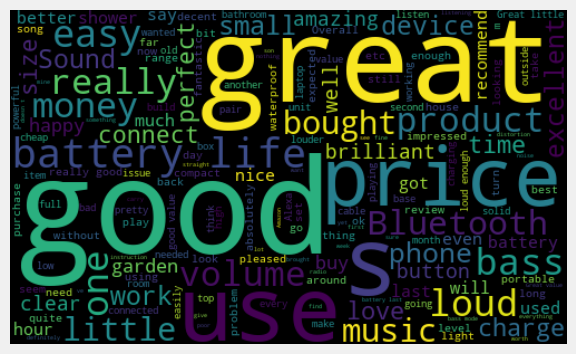

In [21]:
# overall wordcloud
allWords = ' '.join([rws for rws in df['review']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()


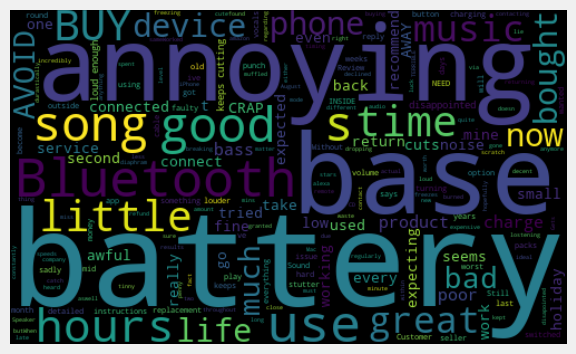

In [22]:
# wordcloud from negative reviews

allNegWords = ' '.join([word for word in df['review'][df['analysis']=='Negative']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allNegWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

Text(0, 0.5, 'Subjectivity')

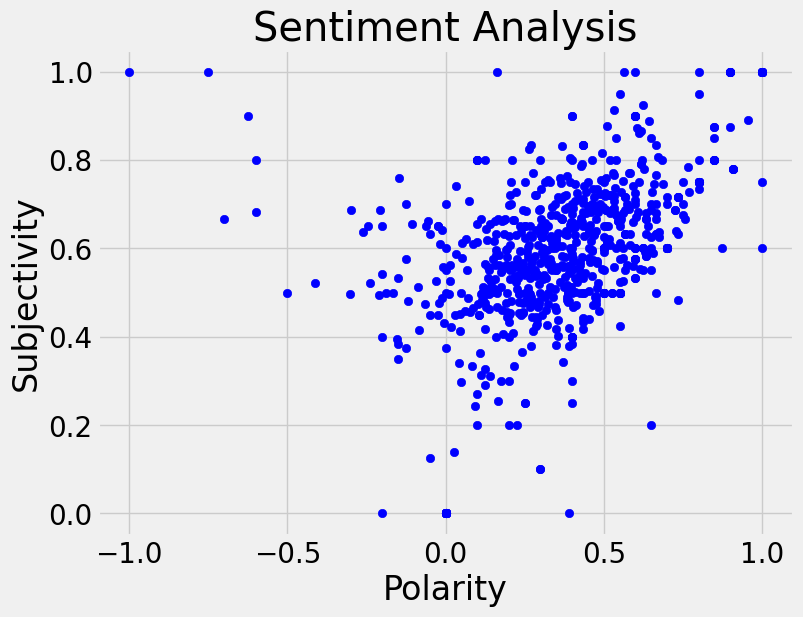

In [23]:
plt.figure(figsize=(8,6))

plt.scatter(df.polarity, df.subjectivity, color='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

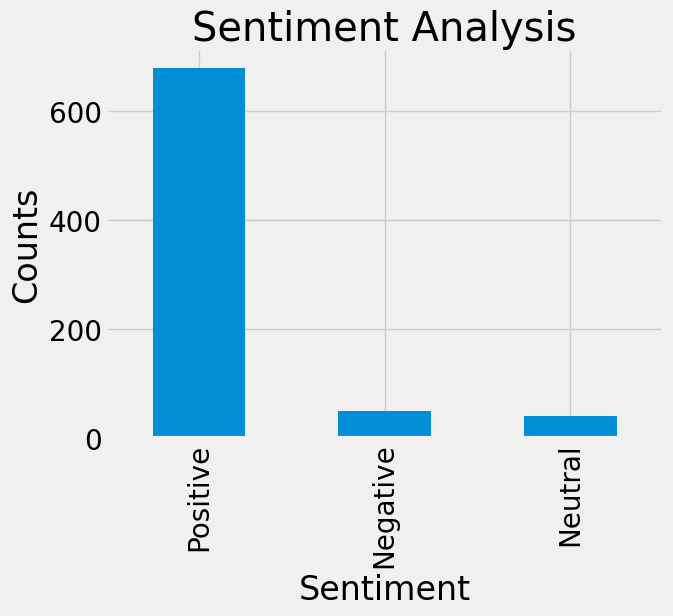

In [24]:
#plot and visualise the number
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['analysis'].value_counts().plot(kind='bar')

plt.show()


In [25]:
# show the value count of sentiment

df['analysis'].value_counts()

Positive    680
Negative     49
Neutral      40
Name: analysis, dtype: int64

In [26]:
# get percentage of positive reviews
previews = df[df.analysis == 'Positive']
previews = previews['review']

print(str(round((previews.shape[0]/df.shape[0])*100,1))+ ' percent of reviews are positive')


88.4 percent of reviews are positive


In [28]:
# get percentage of negative reviews
negreviews = df[df.analysis == 'Negative']
negreviews = negreviews['review']

print(str(round((negreviews.shape[0]/df.shape[0])*100,1))+ ' percent of reviews are negative')


6.4 percent of reviews are negative


In [30]:
# get percentage of neutral reviews
neureviews = df[df.analysis == 'Neutral']
neureviews = neureviews['review']

print(str(round((neureviews.shape[0]/df.shape[0])*100,1))+ ' percent of reviews are neutral')


5.2 percent of reviews are neutral


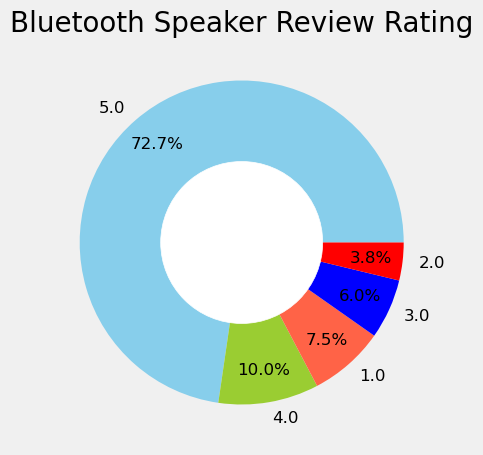

In [34]:
ratings = df["rating"].value_counts()
number = ratings.index
quantity = ratings.values

custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(5, 5))
plt.pie(quantity, labels=number, autopct='%1.1f%%', pctdistance=0.8, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Bluetooth Speaker Review Rating", fontsize=20)
plt.show()